Kbind = 2.26e+07


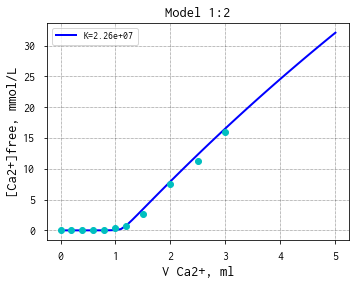

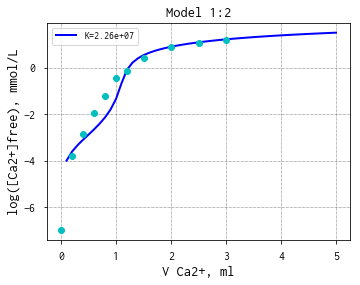

In [1]:
## obliczenia Kbind - wersja automatyczna

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve
from scipy.optimize import curve_fit

# V początkowa roztworu polimeru, L
V0 = 25/1000.0

# stężenie początkowe polimeru, mol/L
cP = ((75/1000)/130)/V0

# stężenie Ca2+ w biurecie, mol/L
cL = 0.25

# początek i koniec miareczkowania
# objęctość Ca+2, L
VL0 = 0.0001
VL1 = 5/1000

# liczba kroków miareczkowania
N = 50



# -------------------------------------------------- trzeba zmieniać
# dane

# miareczkowanie 26.04.2019 PIA1
# V[ml],Cca2+[mmol/l]
exp1 = np.array([
[0.0001,0.0000001],
[0.2,0.000161701],
[0.4,0.001467202],
[0.6,0.010931452],
[0.8,0.062040029],
[1,0.348811247],
[1.2,0.718480629],
[1.5,2.698241768],
[2,7.575332424],
[2.5,11.34107925],
[3,15.89928403],
])


# -------------------------------------------------- można zmieniać
guess_Kbind = 1e4



def model11(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-x)
    return [eq1]


def model12(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-2*x)**2
    return [eq1]


def calc(VVL, K):
    #print("*")
    N, = np.shape(VVL)
    data = np.zeros((N))
    i = 0

    for VL in VVL:
        guess = [1e-3]
        Vtotal = V0 + VL
        nL0 = VL*cL
        nP0 = V0*cP
        L0 = nL0/Vtotal
        P0 = nP0/Vtotal


        # model11 lub model12
        x, = fsolve(model12, guess, args=(K,L0, P0))

        Lb = x
        Lf = L0 - Lb
        nLb = Lb*Vtotal
        nLf = Lf*Vtotal
        data[i] = np.log10(Lf)
        i = i + 1

    return (data)


x = exp1[:,0]
y = np.log10(exp1[:,1])

fit, kcov = curve_fit(calc, x, y, p0=guess_Kbind)
Kbind = fit[0]
print("Kbind = {:.2e}".format(Kbind))



VVL = np.linspace(VL0,VL1,N)
data = np.zeros((7,N))
i = 0
for VL in VVL:
    guess = [1e-3]
    Vtotal = V0 + VL
    nL0 = VL*cL
    nP0 = V0*cP
    L0 = nL0/Vtotal
    P0 = nP0/Vtotal

    # -------------------------------------------------- można zmieniać
    # PARAMETR2
    # model11 lub model12
    x, = fsolve(model12, guess, args=(Kbind,L0, P0))

    Lb = x
    Lf = L0 - Lb
    nLb = Lb*Vtotal
    nLf = Lf*Vtotal

    data[0,i] = Vtotal
    data[1,i] = VL
    data[2,i] = nL0
    data[3,i] = nLf
    data[4,i] = nLb
    data[5,i] = Lf
    data[6,i] = Lb
    i = i + 1

plt.plot(data[1,:]*1000, data[5,:]*1000,'-',label="K={:.2e}".format(Kbind))
# dane doświadczalne
plt.plot(exp1[:,0], exp1[:,1],'o')
plt.grid()
plt.legend()
plt.xlabel('V Ca2+, ml')
plt.ylabel('[Ca2+]free, mmol/L')
plt.title('Model 1:2') ## -------------------- zmodyfikować wg potrzeb
plt.show()


# i w układzie półlogarytmicznym:
plt.xlabel('V Ca2+, ml')
plt.ylabel('log([Ca2+]free), mmol/L')
plt.title('Model 1:2') ## -------------------- zmodyfikować wg potrzeb
plt.plot(data[1,:]*1000,
np.log10(data[5,:]*1000),'-',label="K={:.2e}".format(Kbind))
plt.plot(exp1[:,0], np.log10(exp1[:,1]),'o')
plt.grid()
plt.legend()
plt.show()



